In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [13]:
abc = pd.read_csv('hr_data_cleaned.csv', index_col=0)
abc.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,generation
0,53,No,NaN,2015.722222,research & development,6,3,NaN,1,1,...,5,3.0,20,15.0,15,15,1972,195370.0,True,Gen X


- improving and maintaning a good work-life balance (provide percentage). For example, they travel rarely
- los que tienen remote work tienen más satisfaction
- HR es el departamento con menos satisfacción lo que confirma que es una cuestión de cultura y ambiente
- cuanto más lejos, mayor satisfacción ¿tendrán trabajo remoto?
- si bien es poca la diferencia, la gente que está medianamente involved en el job, tiene mayor environment satisfaction: so continue - - distributing the work load equitativamente
- cuanto menos training, menos environment satisfaction
- healthcare representative: puesto con más satisfaction. A destacar, es el puesto con menos attrition, tiene un bussines travel medio y a excepción de los puestos de manager y director, es el dept con mejores salarios


Conclusiones presentación:
- continue trabajando en la work-life balance: ba´sandonos en bussines travel, w-lb y work load

In [14]:
abc[abc['department'] == 'human resources']['environmentsatisfaction'].unique()

array([1, 3, 2, 4])

In [15]:
comprobación = abc.groupby('department')['environmentsatisfaction'].value_counts()

In [16]:
print(comprobación)

department              environmentsatisfaction
human resources         3                           25
                        2                           12
                        4                           11
                        1                           10
research & development  4                          309
                        3                          296
                        1                          206
                        2                          190
sales                   4                          137
                        3                          129
                        1                           99
                        2                           99
Name: count, dtype: int64


/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_45429/3408076684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=abc, x='department', y='environmentsatisfaction', palette='Blues')


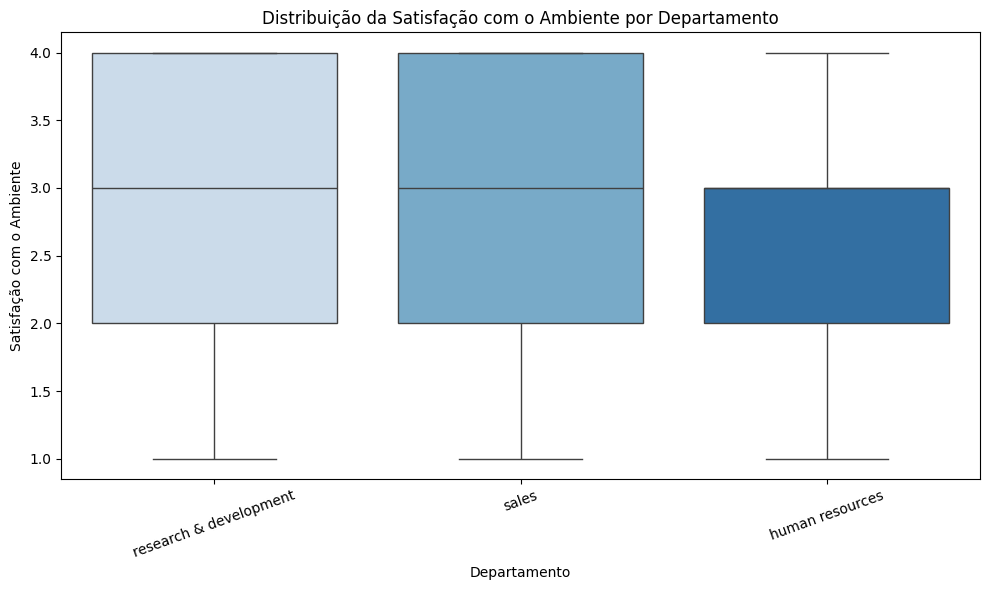

In [35]:
# Satisfação no ambiente de trabalho por departamento
plt.figure(figsize=(10, 6))
sns.boxplot(data=abc, x='department', y='environmentsatisfaction', palette='Blues')
plt.xticks(rotation=20)
plt.xlabel('Departamento')
plt.ylabel('Satisfação com o Ambiente')
plt.title('Distribuição da Satisfação com o Ambiente por Departamento')
plt.tight_layout()
plt.show()

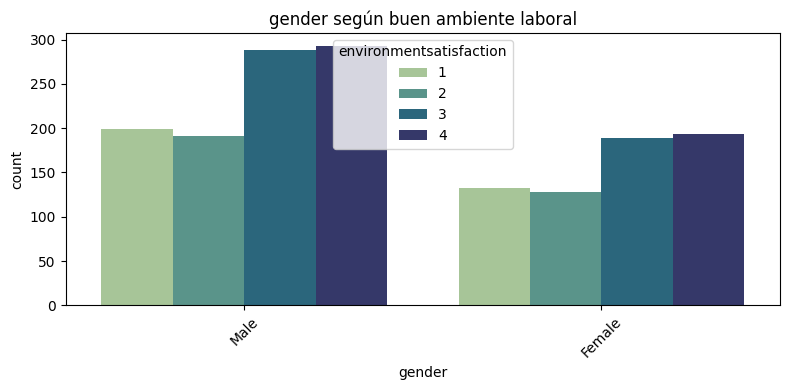

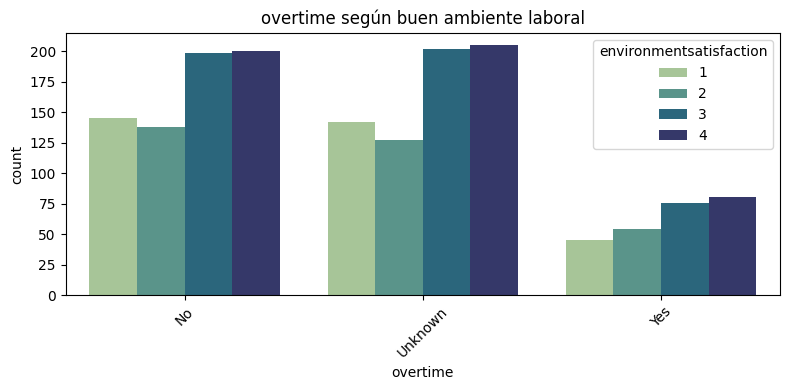

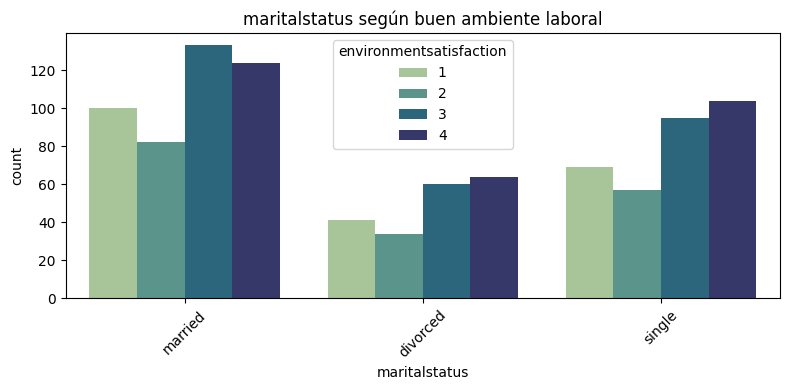

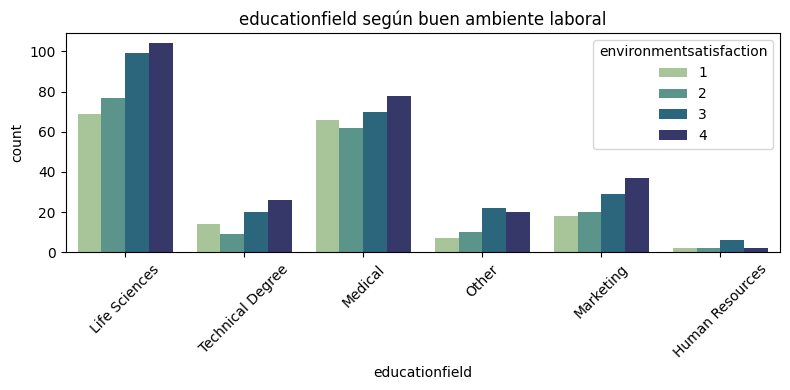

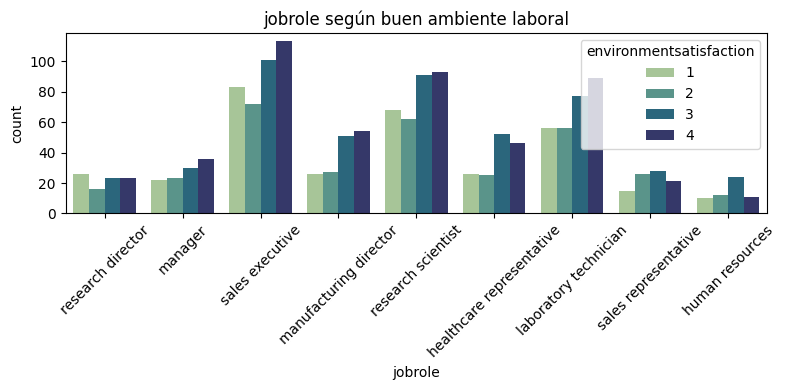

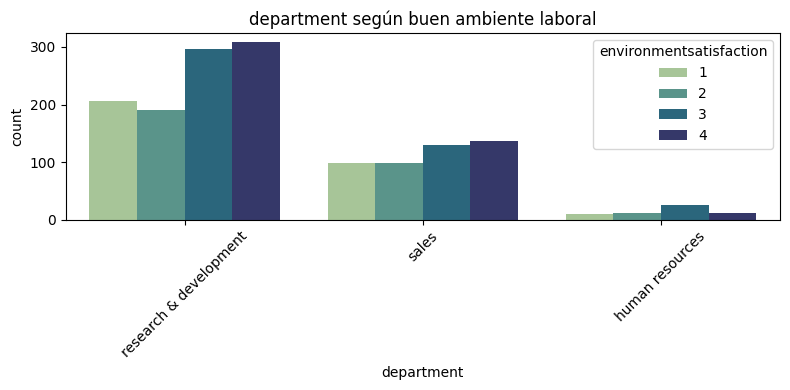

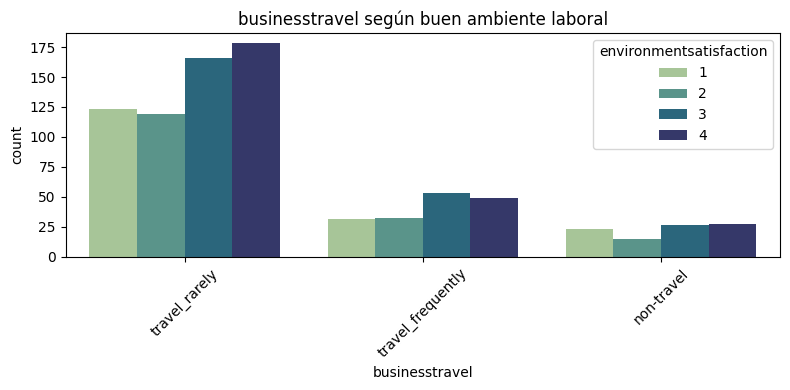

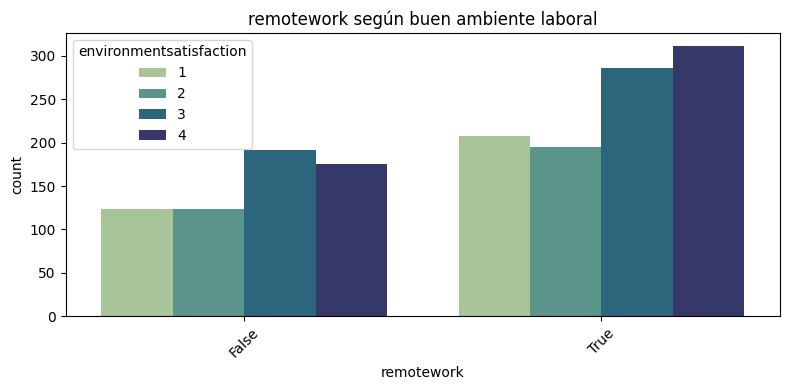

In [18]:
categoricas = ['gender', 'overtime', 'maritalstatus', 'educationfield', 'jobrole', 'department', 'businesstravel', 'remotework']

for col in categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(data=abc, x=col, hue='environmentsatisfaction', palette='crest')
    plt.title(f'{col} según buen ambiente laboral')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [19]:
numericas = ['age', 'monthlyincome_$', 'distancefromhome', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=abc, x='buen_ambiente', y=col, palette='crest')
    plt.title(f'{col} según buen ambiente laboral')
    plt.tight_layout()
    plt.show();


ValueError: Could not interpret value `buen_ambiente` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

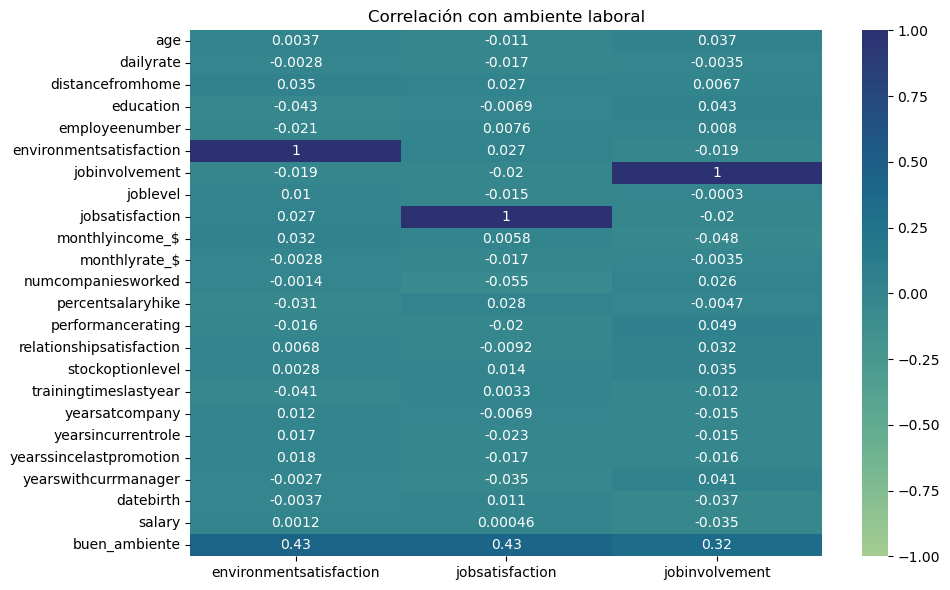

In [ ]:
# Filtramos solo columnas numéricas
num_cols = abc.select_dtypes(include=np.number)

# Matriz de correlación
corr = num_cols.corr()

# Visualizamos solo las correlaciones con nuestras tres variables clave
plt.figure(figsize=(10,6))
sns.heatmap(corr[['environmentsatisfaction', 'jobsatisfaction', 'jobinvolvement']],
            annot=True, cmap='crest', vmin=-1, vmax=1)
plt.title('Correlación con ambiente laboral')
plt.tight_layout()
plt.show()


¿Qué significa esto?
Sugiere que el ambiente laboral no depende tanto de los factores numéricos cuantificables, sino probablemente de factores cualitativos o culturales, como:

El tipo de liderazgo

La flexibilidad del horario o el teletrabajo

El trato entre compañeros

La presión o carga de trabajo

El rol desempeñado

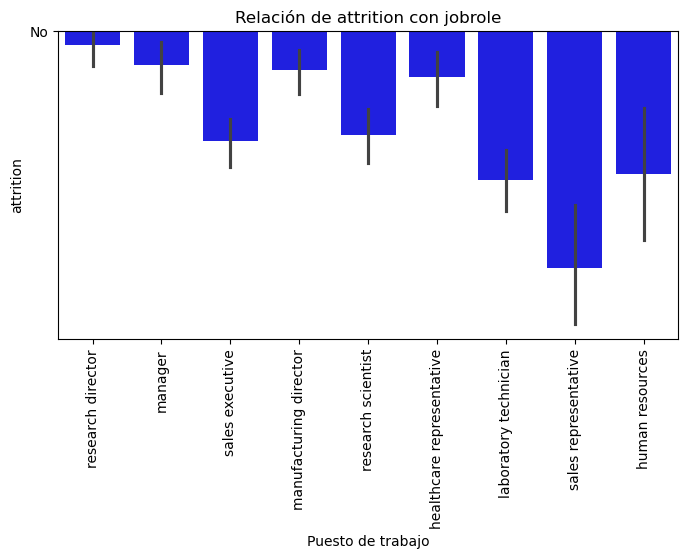

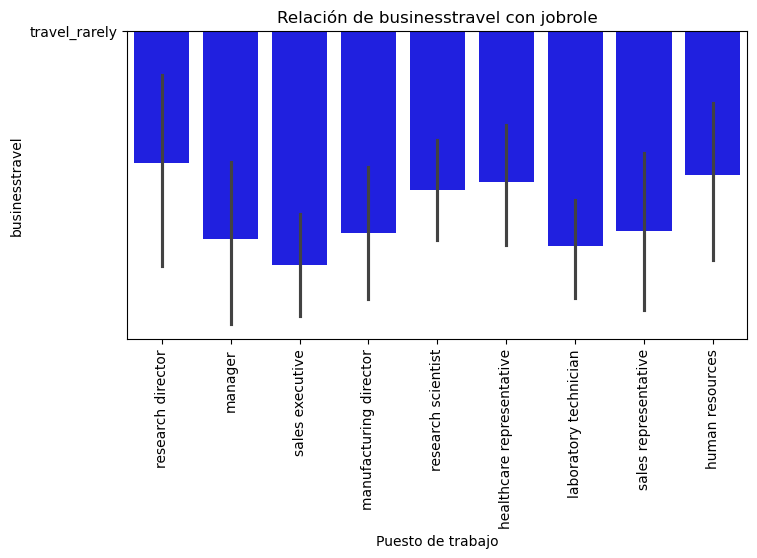

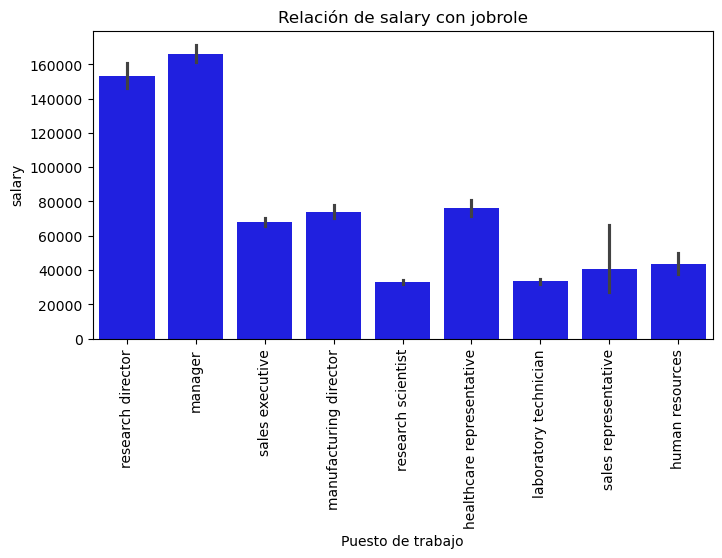

In [ ]:
cols = ['attrition', 'businesstravel', 'salary']

for col in cols:
    plt.figure(figsize=(8,4))
    sns.barplot(data=abc, x='jobrole', y=col, color='blue')
    plt.title(f'Relación de {col} con jobrole')
    plt.xlabel('Puesto de trabajo')
    plt.xticks(rotation=90)

C:\Users\irene\AppData\Local\Temp\ipykernel_20632\3122484812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporciones.values, y=proporciones.index, palette='crest')


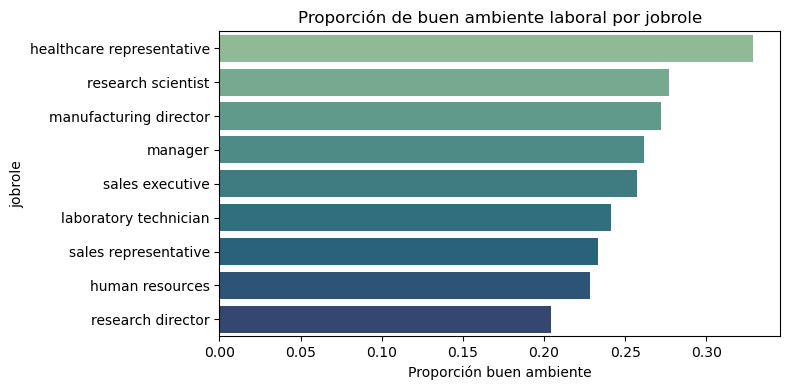

C:\Users\irene\AppData\Local\Temp\ipykernel_20632\3122484812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporciones.values, y=proporciones.index, palette='crest')


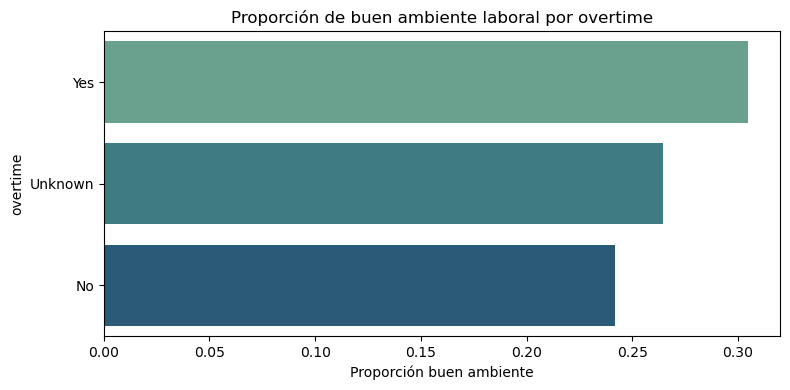

C:\Users\irene\AppData\Local\Temp\ipykernel_20632\3122484812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporciones.values, y=proporciones.index, palette='crest')


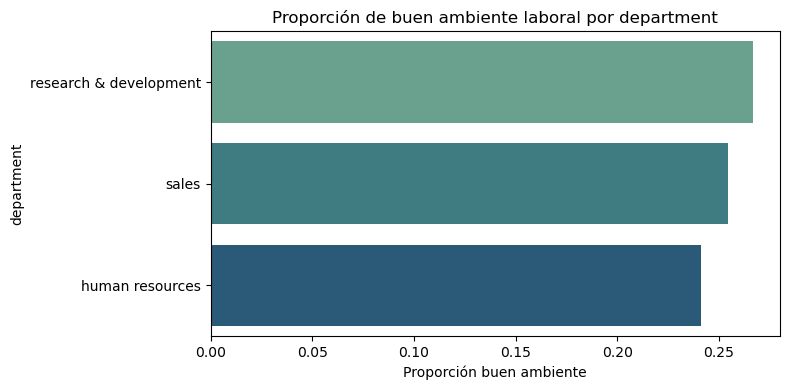

C:\Users\irene\AppData\Local\Temp\ipykernel_20632\3122484812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporciones.values, y=proporciones.index, palette='crest')


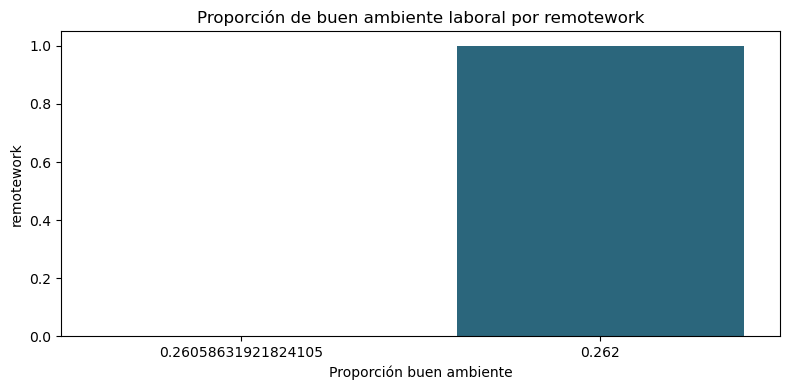

C:\Users\irene\AppData\Local\Temp\ipykernel_20632\3122484812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporciones.values, y=proporciones.index, palette='crest')


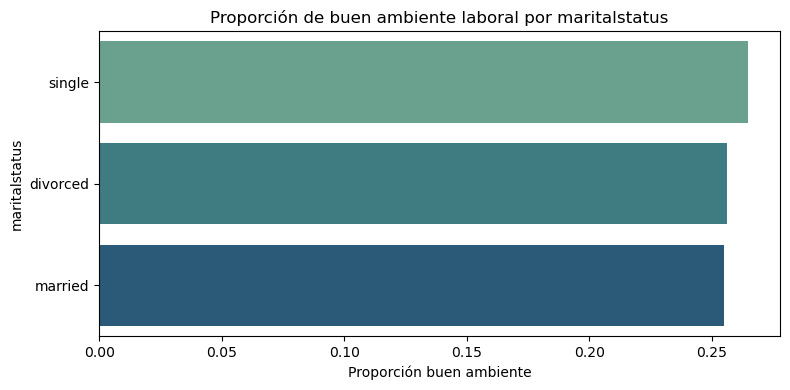

In [ ]:
cat_cols = ['jobrole', 'overtime', 'department', 'remotework', 'maritalstatus']

for col in cat_cols:
    proporciones = abc.groupby(col)['buen_ambiente'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=proporciones.values, y=proporciones.index, palette='crest')
    plt.title(f'Proporción de buen ambiente laboral por {col}')
    plt.xlabel('Proporción buen ambiente')
    plt.tight_layout()
    plt.show()


In [ ]:
abc = pd.read_csv('df_definitivo.csv', index_col=0)

In [ ]:
empleados = abc.loc[abc['attrition'] == 'No',:] 

In [ ]:
abc.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome_$,monthlyrate_$,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
1580,41,No,NaN,556.256661,research & development,2,4,Technical Degree,1581,4,Female,2,2,healthcare representative,3,single,4492.84000,11681.39,1,No,11,3.0,1,Part Time,0,4,3.0,20,7.0,11,10,1984,53914.11,False
1460,44,No,travel_rarely,556.256661,sales,12,4,Marketing,1461,2,Male,3,2,sales executive,4,divorced,11125.13322,11681.39,3,Unknown,12,0.0,3,Part Time,2,4,3.0,0,0.0,0,0,1981,53914.11,False
1295,30,No,travel_rarely,470.269841,research & development,17,2,NaN,1296,3,Male,3,2,laboratory technician,1,NaN,3798.33000,9875.67,1,Unknown,12,3.0,4,Part Time,1,2,Unknown,10,1.0,1,8,1995,45580.00,False


In [ ]:
empleados_contentos = abc.groupby("environmentsatisfaction")

In [ ]:
empleados_contentos.ngroups

4

In [ ]:
empleados_contentos[['jobinvolvement', 'jobsatisfaction', 'attrition']].count().reset_index()

,environmentsatisfaction,jobinvolvement,jobsatisfaction,attrition
0,1,332,332,332
1,2,319,319,319
2,3,477,477,477
3,4,486,486,486


In [ ]:
condiciones = abc[
    (abc['attrition'] == 'No') &
    (abc['environmentsatisfaction'] >= 3) &
    (abc['jobinvolvement'] >= 3) &
    (abc['jobsatisfaction'] >= 3)
]

In [ ]:
condiciones.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome_$,monthlyrate_$,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
2,44,No,travel_rarely,1984.253968,research & development,4,2,Technical Degree,3,3,Male,3,5,manager,4,married,39685.079365,41669.33,1,No,11,3.0,4,Unknown,0,3,Unknown,22,11.0,11,15,1981,192320.00,True
5,50,No,NaN,1771.920635,research & development,22,3,Medical,6,4,Female,3,4,manager,4,NaN,14311.670000,37210.33,3,No,11,3.0,2,Full Time,1,3,3.0,22,4.0,4,7,1975,171740.04,True
15,42,No,travel_rarely,1861.373016,NaN,2,4,NaN,16,3,Female,3,5,manager,3,NaN,15034.170000,39088.83,0,No,14,3.0,4,Full Time,0,2,3.0,20,1.0,1,12,1983,180410.00,False
22,38,No,NaN,1032.487286,research & development,8,3,NaN,23,3,Female,3,3,healthcare representative,3,divorced,20649.745724,21682.23,1,Unknown,13,0.0,2,Unknown,3,2,3.0,17,12.0,12,8,1987,100071.84,True
23,49,No,NaN,1728.380952,NaN,2,2,Other,24,3,Female,3,4,manager,4,married,34567.619048,36296.00,1,Unknown,11,3.0,3,Full Time,1,3,2.0,26,3.0,3,0,1976,167520.00,False


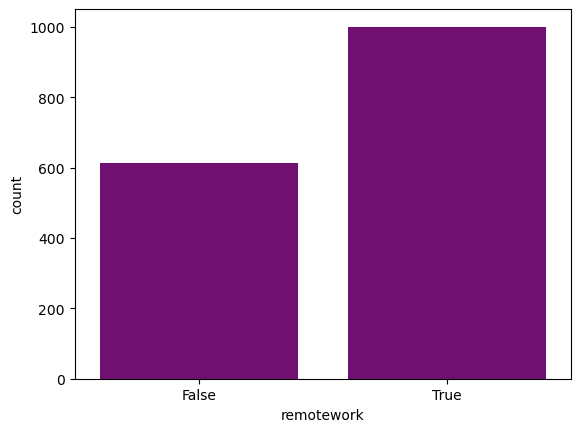

In [ ]:
sns.countplot(x = "remotework", 
              data = abc, 
              color = "purple");

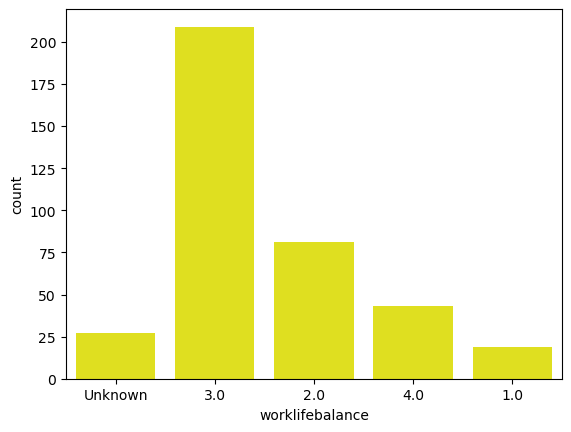

In [ ]:
sns.countplot(x = "worklifebalance", 
              data = condiciones, 
              color = "yellow");

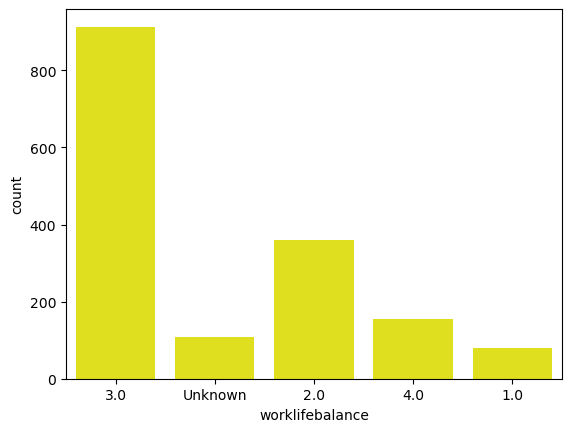

In [ ]:
sns.countplot(x = "worklifebalance", 
              data = abc, 
              color = "yellow");

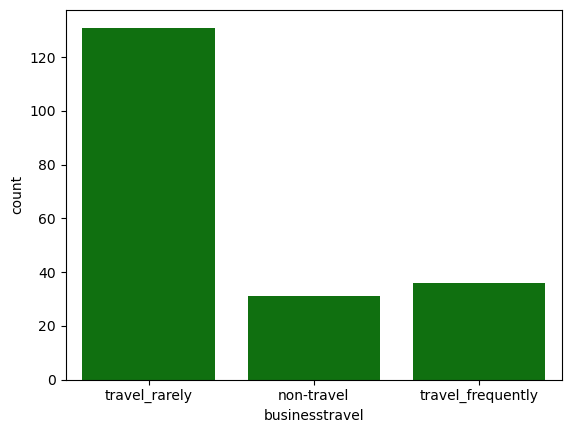

In [ ]:
sns.countplot(x = "businesstravel", 
              data = condiciones, 
              color = "green");

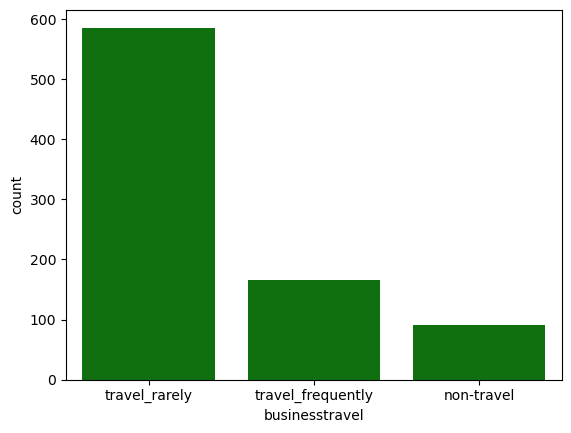

In [ ]:
sns.countplot(x = "businesstravel", 
              data = abc, 
              color = "green");

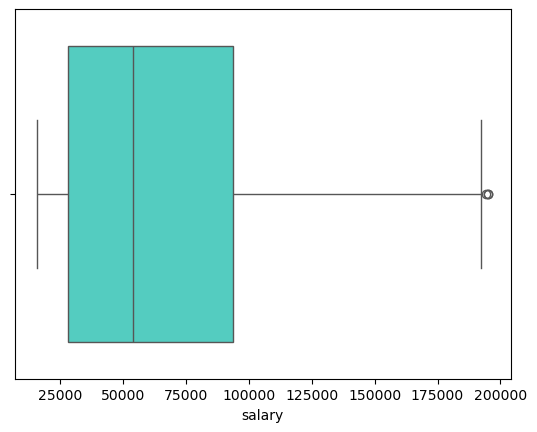

In [ ]:
sns.boxplot(x = "salary", 
            data = condiciones, 
            color = "turquoise", 
            );

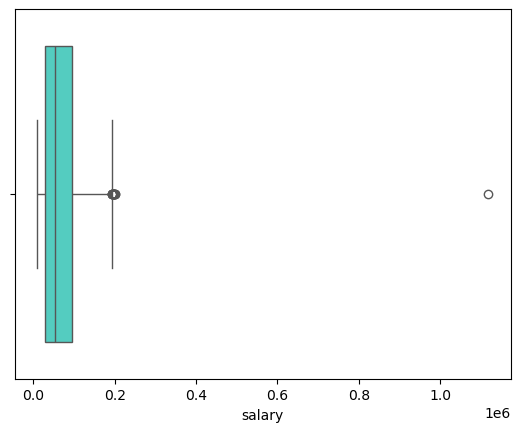

In [ ]:
sns.boxplot(x = "salary", 
            data = abc, 
            color = "turquoise", 
            );

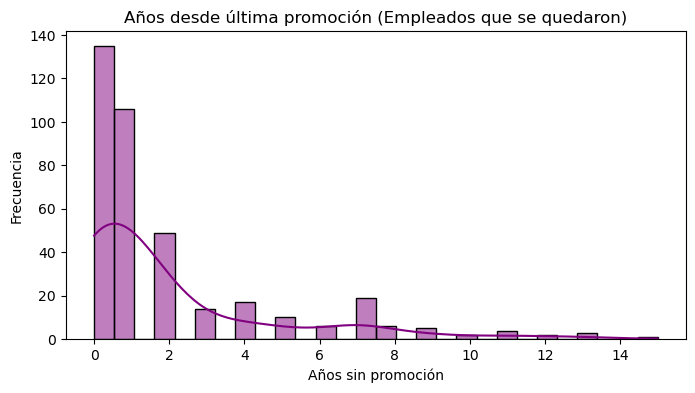

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=condiciones, x='yearssincelastpromotion', kde=True, color='purple')
plt.title('Años desde última promoción (Empleados que se quedaron)')
plt.xlabel('Años sin promoción')
plt.ylabel('Frecuencia')
plt.show()

/var/folders/fw/63lcqvrj3gj5_78zkmp2ql8r0000gp/T/ipykernel_45429/4275456494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


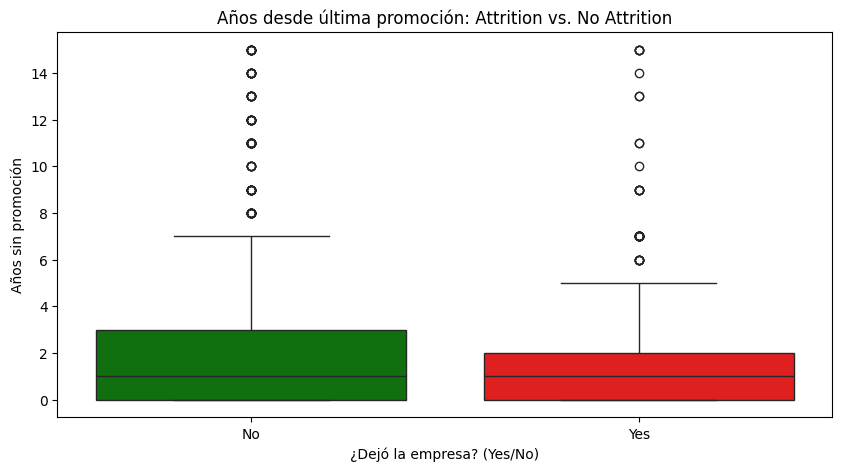

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=abc,  # Usamos el dataframe completo (no filtrado)
    x='attrition', 
    y='yearssincelastpromotion',
    palette={'Yes': 'red', 'No': 'green'}  # Colores para claridad
)
plt.title('Años desde última promoción: Attrition vs. No Attrition')
plt.xlabel('¿Dejó la empresa? (Yes/No)')
plt.ylabel('Años sin promoción')
plt.show();

In [21]:
abc_empleados = abc['attrition'] == 'No'

In [22]:
df_abc_empleados = abc[abc_empleados]

In [34]:
df_abc_empleados.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,...,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework,generation
778,39,No,travel_rarely,442.000000,research & development,7,4,Medical,779,4,...,2,3.0,5,0.0,0,4,1986,42840.0,True,Millennials
1587,43,No,NaN,1979.817460,NaN,1,3,NaN,1588,4,...,3,3.0,22,2.0,2,10,1982,191890.0,False,Millennials
375,52,No,non-travel,654.849206,sales,1,3,Life Sciences,376,4,...,3,3.0,18,0.0,0,13,1973,63470.0,True,Gen X


In [27]:
correlacion = abc.corr('pearson', numeric_only=True)

In [28]:
correlacion1 = abc.corr('kendall', numeric_only=True)

In [29]:
mask = np.triu(np.ones_like(correlacion1, dtype=bool))

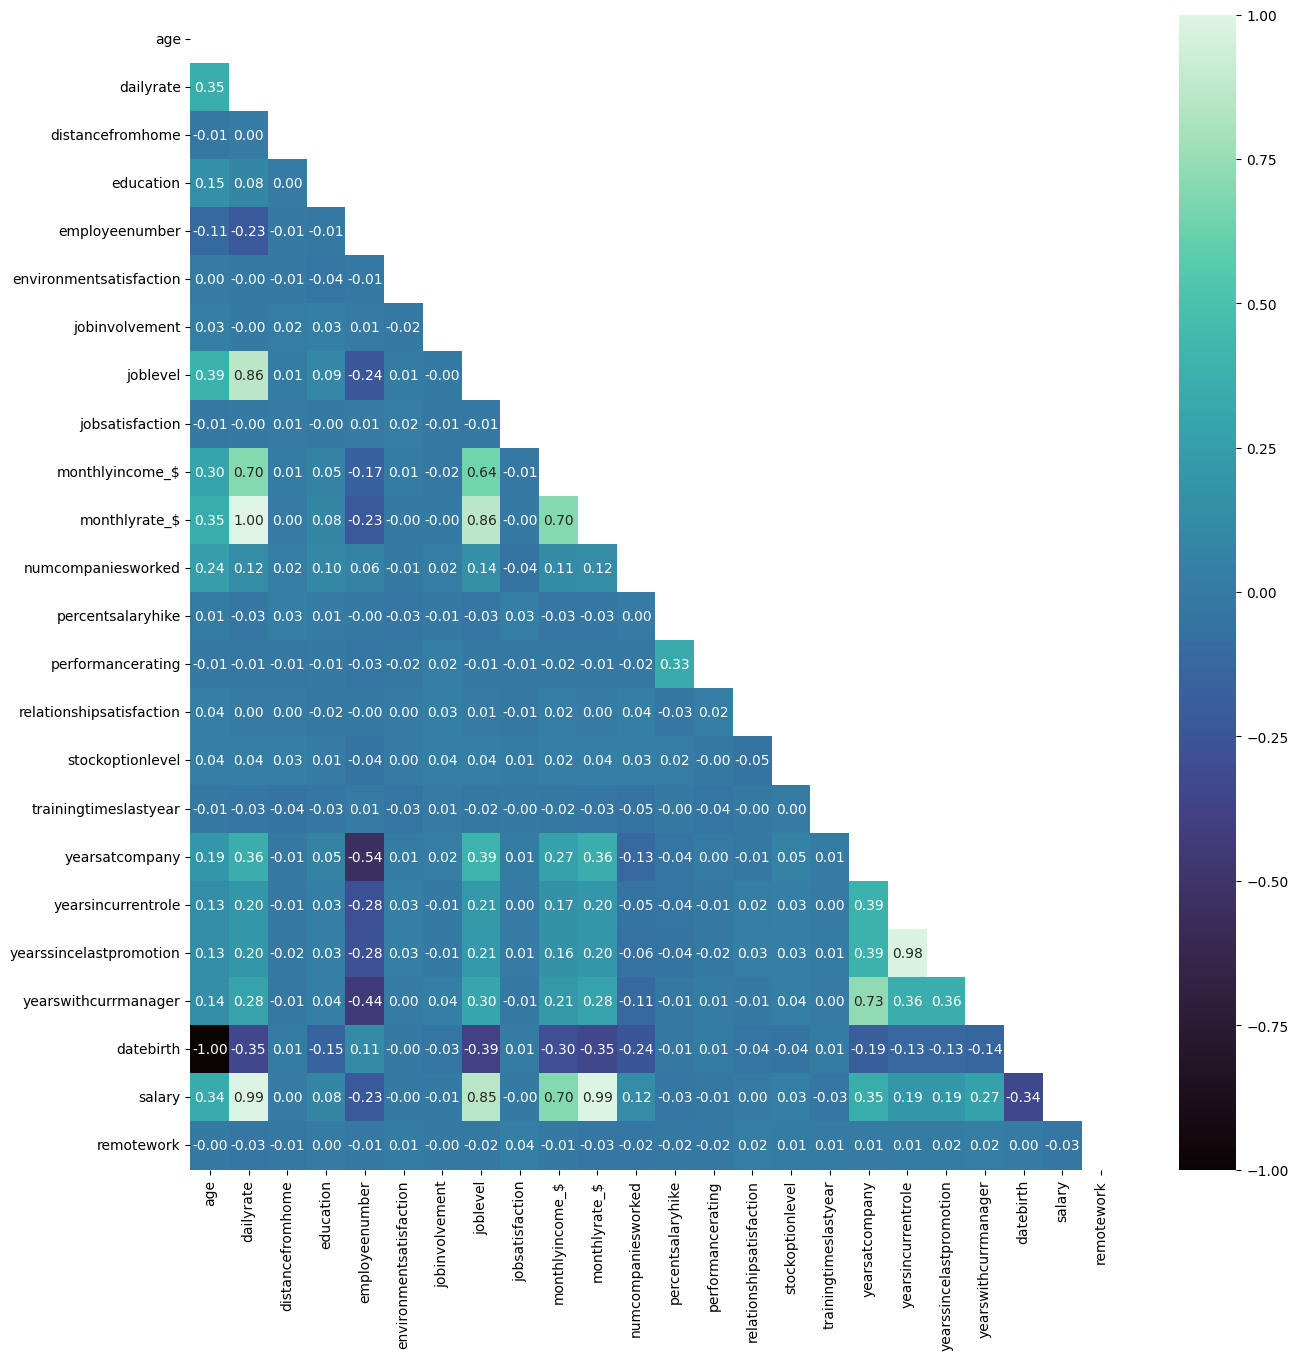

In [31]:
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(correlacion1, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1,
            mask= mask); # para ident
plt.show()